In [1]:
import keras.backend as K
from keras import Input, Model, Sequential
from keras.layers import *
from keras.optimizers import Adam, RMSprop
from keras.callbacks import *

from matplotlib import pyplot as plt
import json

import sys
sys.path.append("..")
from generative_models import utils

/home/luca/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def combine_data(real_data, fake_data, split):    
    N_r = real_data.shape[0]
    N_f = fake_data.shape[0]
    
    x_train = np.vstack([real_data, fake_data]) 
    y_train = np.vstack([np.zeros((N_r, 1)), np.ones((N_f, 1))])

    N = x_train.shape[0]
    shuffled_indexes = np.random.permutation(N)

    x_train = x_train[shuffled_indexes]
    y_train = y_train[shuffled_indexes]

    split_index = int(N*split)

    x_test, x_train = x_train[:split_index], x_train[split_index:]
    y_test, y_train = y_train[:split_index], y_train[split_index:]

    return (x_train, y_train), (x_test, y_test)

def build_classifier(timesteps):
    model_inputs = Input((timesteps,))
    classified = model_inputs

    classified = Dense(15, activation='relu')(classified)
    classified = Dense(5, activation='relu')(classified)
    classified = Dense(1, activation = 'sigmoid')(classified) 

    classifier = Model(model_inputs, classified, 'classifier')
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return classifier

def evaluate_data(real_data, generated_data):
    (x_train, y_train), (x_test, y_test) = combine_data(real_data, generated_data, split)
    classifier = build_classifier(timesteps)
    history = classifier.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=0)
    
    return history

def save_to_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4, sort_keys=True)

In [13]:
def run_comparison(real_data, generated_data_filepaths, labels):
    metrics = ['loss', 'acc', 'val_loss', 'val_acc']
    histories = {}

    for index, filepath in enumerate(generated_data_filepaths):
        print(labels[index])
        generated_data = np.load(filepath)[:elements]
        history = evaluate_data(real_data, generated_data)
        histories[labels[index]] = history.history

    plt.subplots(3, 2, figsize=(15, 12))
    for index, metric in enumerate(metrics):
        plt.subplot(3, 2, index+1)
        plt.title(metric)
        for label in labels:
            history = histories[label]
            plt.plot(history[metric], label=label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(3, 2, 5)
    plt.title('final_scores')
    final_scores = []
    for label in labels:
            history = histories[label]
            final_scores.append(history['val_acc'][-1])
    axis = range(len(final_scores))
    plt.bar(axis, final_scores)
    plt.xticks(axis, labels, rotation=45)
    plt.ylim(min(final_scores) - 0.01, 1)
    plt.show()
    
    return histories

## Models comparison

In [14]:
timesteps = 90
elements = 1000
split = 0.3
epochs = 10

transactions_filepath = '../../datasets/berka_dataset/usable/normalized_transactions_months.npy'
real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)[:elements]

vanilla
mbd
packing


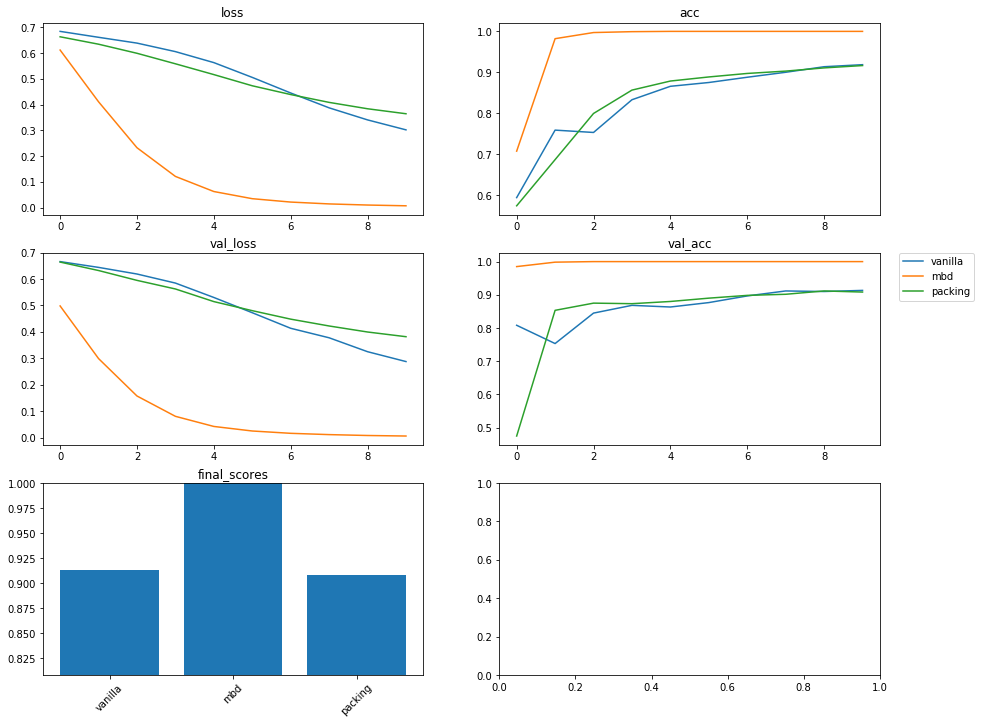

In [15]:
labels = ['vanilla', 'mbd', 'packing']

base_filepath = '../generative_models/wgan_gp/outputs/final/'
end_filename = 'generated_datasets/last.npy'
         
generated_data_filepaths = []
             
for label in labels:
    generated_data_filepaths.append(base_filepath + label + '/' + end_filename)
    
histories = run_comparison(real_data, generated_data_filepaths, labels)
save_to_json('nn_classification_models_comparison.json', histories)

## Performance analysis during training

In [16]:
timesteps = 90
elements = 1000
split = 0.3
epochs = 10

labels = ['100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1M']

transactions_filepath = '../../datasets/berka_dataset/usable/normalized_transactions_months.npy'
real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)[:elements]

### Vanilla

100k
200k
300k
400k
500k
600k
700k
800k
900k
1M


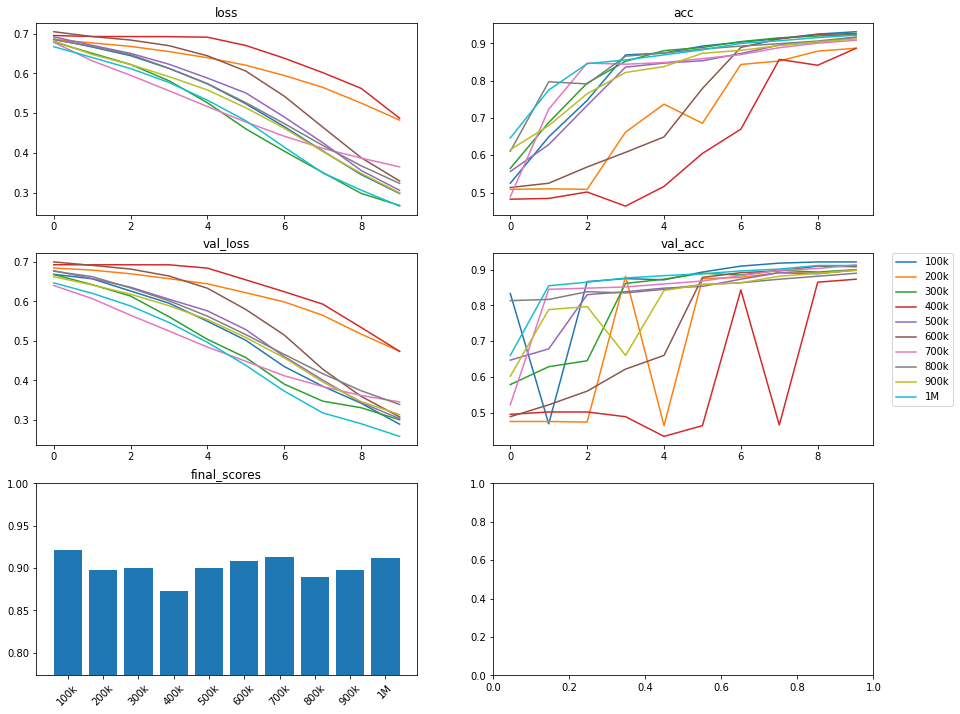

In [17]:
base_filepath = '../generative_models/wgan_gp/outputs/final/vanilla/generated_datasets/'
generated_data_filepaths = []

for n in range(100000, 1000001, 100000):
    generated_data_filepaths.append(base_filepath + str(n) + '_generated_data.npy')
    
histories = run_comparison(real_data, generated_data_filepaths, labels)
save_to_json('nn_classification_vanilla.json', histories)

### Mbd

100k
200k
300k
400k
500k
600k
700k
800k
900k
1M


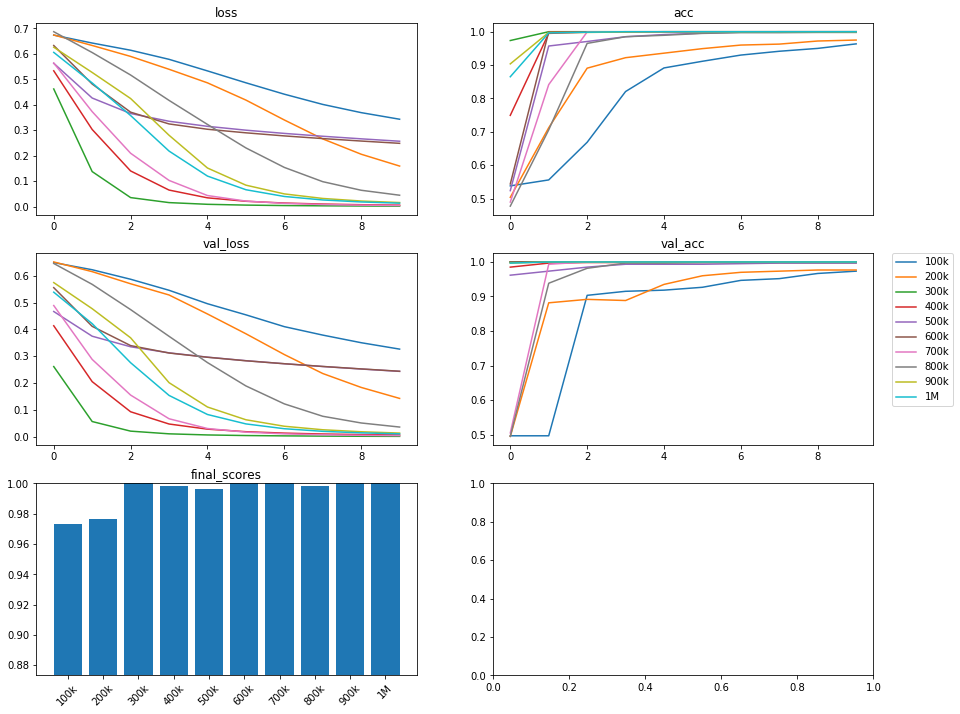

In [18]:
base_filepath = '../generative_models/wgan_gp/outputs/final/mbd/generated_datasets/'
generated_data_filepaths = []

for n in range(100000, 1000001, 100000):
    generated_data_filepaths.append(base_filepath + str(n) + '_generated_data.npy')
    
histories = run_comparison(real_data, generated_data_filepaths, labels)
save_to_json('nn_classification_mbd.json', histories)

### Packing

100k
200k
300k
400k
500k
600k
700k
800k
900k
1M


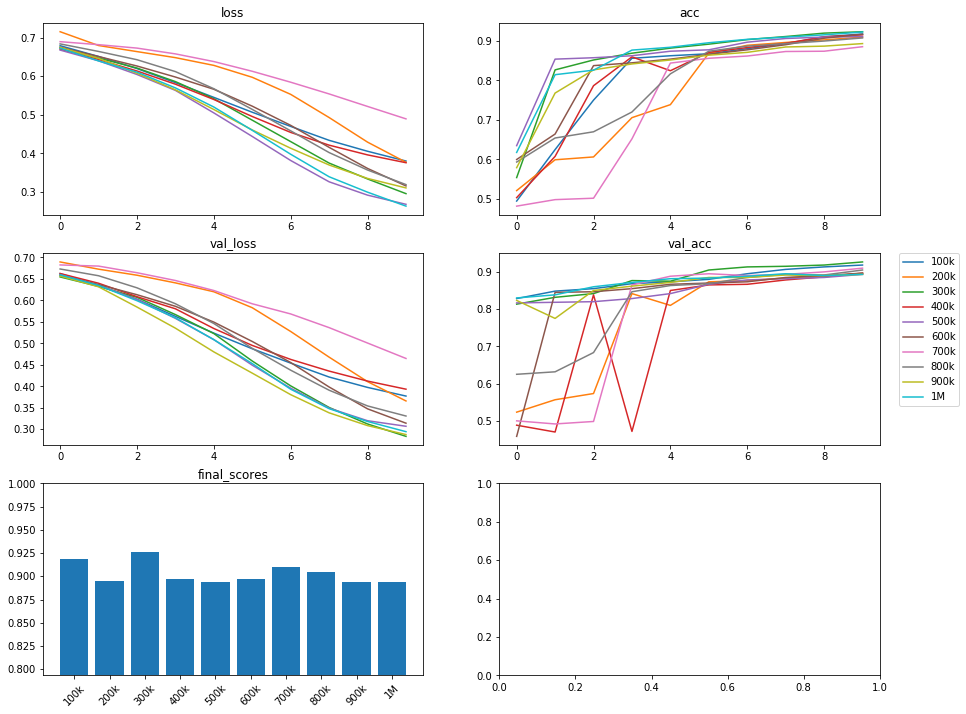

In [19]:
base_filepath = '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/'
generated_data_filepaths = []

for n in range(100000, 1000001, 100000):
    generated_data_filepaths.append(base_filepath + str(n) + '_generated_data.npy')
    
histories = run_comparison(real_data, generated_data_filepaths, labels)
save_to_json('nn_classificaion_packing.json', histories)